# Inaugural Project

Hi! Welcome to my Inaugural Project...

Here I import modules and autoreload them, so to make the code run smoothly. 
<br>
I also import the model from the folder `inauguralproject` which this code refers to.

In [1]:
# import modules
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# model
from inauguralproject import HouseholdSpecializationModelClass

I use a general style for all my plots!

In [2]:
# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 12})

# Question 1

To solve the first question I call the model. I then create two vectors, one for the values of $\alpha$ and one for the values of $\sigma$.Having specified the vectors, I create empty lists to append the results. 

I solve the model for varying $\alpha$ and $\sigma$ values using a nested `for loop`.
The `for loop` loops through each value of $\alpha$ and $\sigma$, thus to create $3\times3=9$ values of $H_F/H_M$.

In [3]:
# call the model
model = HouseholdSpecializationModelClass()

# vector of alpha and sigma
alpha_vec = [0.25, 0.50, 0.75]
sigma_vec = [0.5, 1.0, 1.5]

# empty lists
alpha_list = []
sigma_list = []
HF_HM_list = []

# solve model for alpha, sigma and HF_HM
for alpha in alpha_vec:

    # set the models alpha parameter to alpha in the alpha vector
    model.par.alpha = alpha
    
    # ignore warning  
    warnings.filterwarnings(action='ignore')

    for sigma in sigma_vec:
        
        # set the models sigma parameter to sigma in the sigma vector
        model.par.sigma = sigma

        # solve the model
        opt = model.solve_discrete()

        # for each value of HF and HM find HF/HM
        HF_HM = opt.HF / opt.HM

        # append the result to the lists
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        HF_HM_list.append(HF_HM)

        # print results
        print(f'HF/HM ={HF_HM: .3f} for alpha = {alpha}, sigma = {sigma}')

HF/HM = 0.545 for alpha = 0.25, sigma = 0.5
HF/HM = 0.308 for alpha = 0.25, sigma = 1.0
HF/HM = 0.214 for alpha = 0.25, sigma = 1.5
HF/HM = 1.000 for alpha = 0.5, sigma = 0.5
HF/HM = 1.000 for alpha = 0.5, sigma = 1.0
HF/HM = 1.000 for alpha = 0.5, sigma = 1.5
HF/HM = 1.833 for alpha = 0.75, sigma = 0.5
HF/HM = 3.250 for alpha = 0.75, sigma = 1.0
HF/HM = 4.667 for alpha = 0.75, sigma = 1.5


To present the results I use `pd.DataFrame` to create a pivot table.


In [4]:
# create DataFrame 
df = pd.DataFrame({'alpha': alpha_list, 'sigma': sigma_list, 'HF/HM': HF_HM_list})

# convert the DataFrame into a pivot table
table = pd.pivot_table(df, values='HF/HM', index='sigma', columns='alpha')

# display the pivot table
display(table)

alpha,0.25,0.50,0.75
sigma,,,
0.5,0.545455,1.0,1.833333
1.0,0.307692,1.0,3.250000
1.5,0.214286,1.0,4.666667


From the table, it is apparent that, all else being equal, a higher value of $\alpha$ - which determines women's productivity in home production relative to men - results in a larger amount of home production for women.

The elasticity of substitution, $\sigma$, greatly depends on the value of $\alpha$. Therefore, a low value of $\alpha$ and a high value of $\sigma$ result in a lower amount of home production for women. The interpretation is that men are more productive at home than women given a low value of $\alpha$, and it is easier to substitute home production for market production - vice versa.



# Question 2

I solved question 2 using a method very similar to that of question 1, with the exception that I utilized `numpy` to take logarithms.

In [11]:
# call the model
model = HouseholdSpecializationModelClass()

# call model.solve_wF_vec() for the discrete case
model.solve_wF_vec(discrete=True)

# calculate log(HF/HM) and log(wF/wM) for the discrete case
dis_log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)
dis_log_wF_wM = np.log(model.par.wF_vec / model.par.wM)

# print the lists
#print(f'Discrete case:\nlog(HF/HM) = {dis_log_HF_HM}\nlog(wF/wM) = {dis_log_wF_wM}')

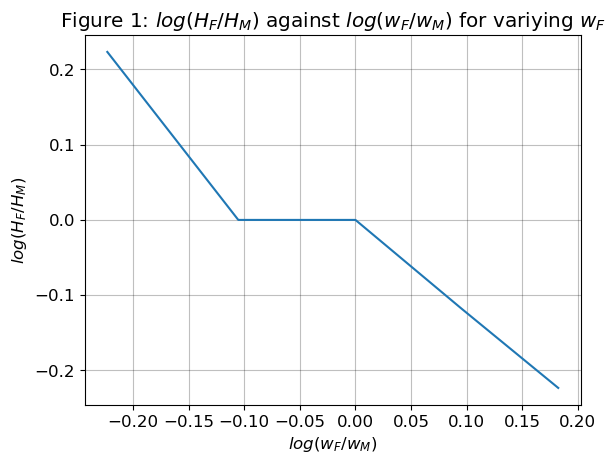

In [6]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)
ax.plot(dis_log_wF_wM,dis_log_HF_HM)

# set title, x- and y-label. 
ax.set_title('Figure 1: $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

Based on the graph, one can draw a normative economic conclusion that as women's earnings relative to men's increase, their engagement in home production decreases relative to men.

# Question 3

Similarly to question two, the approach remains unchanged except that I solve continuously for $L_M$, $L_F$, $H_M$, and $H_F$ instead of discretely using `scipy`.
<br>
This modification should eliminate the kink in figure 1, albeit dull, it should enhance the visual appeal.

In [16]:
# call the model
model = HouseholdSpecializationModelClass()

# call model.solve_wF_vec() for the continuous case
model.solve_wF_vec(discrete=False)

# calculate log(HF/HM) and log(wF/wM) for the continuous case
c_log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)
c_log_wF_wM = np.log(model.par.wF_vec / model.par.wM)

# print the lists
#print(f'Continuous case:\nlog(HF/HM) = {c_log_HF_HM}\nlog(wF/wM) = {c_log_wF_wM}')


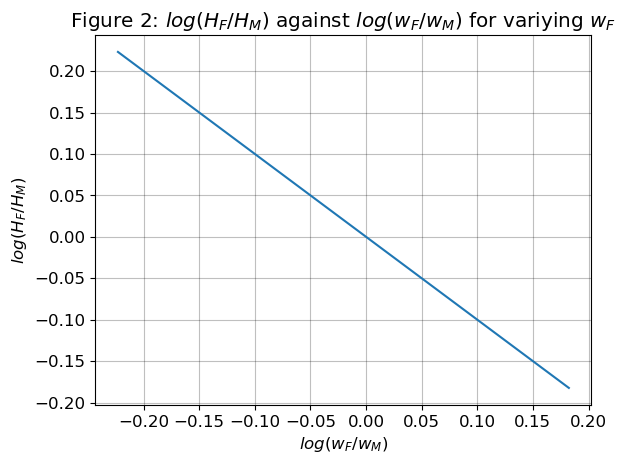

In [8]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)
ax.plot(c_log_wF_wM,c_log_HF_HM)

# set title, x- and y-label
ax.set_title('Figure 2: $log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

The kinks are eliminated!.. Besides that; the conclusion are unchanged.

# Question 4

Here it gets interesting! And... maybe not so much.
<br>
All code for minimizing the sqaured residuals are in `inauguralproject.py`.

In [9]:
model.estimate()

print(f"For alpha = {model.sol.alpha:.3f} and sigma = {model.sol.sigma:.3f} the squared errors are minimized such that:\n\
beta0 = {model.sol.beta0:.3f}\n\
beta1 = {model.sol.beta1:.3f}")

For alpha = 0.982 and sigma = 0.100 the squared errors are minimized such that:
beta0 = 0.400
beta1 = -0.100


Luckily, the results are interesting. In order to minimize the squared residuals, a high value of $\alpha$ and a low value of $\sigma$ are required. This finding leads to a more economically positivistic conclusion: women's home productivity is significantly higher than men's, and the substitutability between working at home and in the market is very low.

This may also be infered from the high $\beta_0\approx0.4$ and the sign of $\beta_1\approx-0.1$

# Question 5

I am sorry, but I did not have time.